In [122]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import scipy
import import_ipynb
from K_means import *
import displayData as disp

In [55]:
data=scio.loadmat("ex7data1")
X=data["X"]
(m,n)=X.shape

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


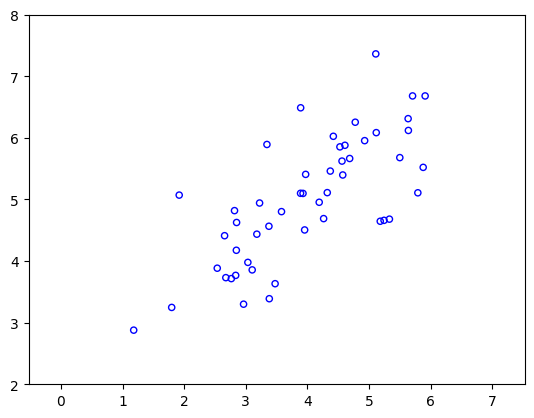

In [56]:
# Visualize the example dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b', s=20)
plt.axis('equal')
plt.axis([0.5, 6.5, 2, 8])
plt.show()

In [57]:
# ===================== Part 2: Principal Component Analysis =====================

In [58]:
def feature_normalize(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma

In [59]:
X_norm,mu,sigma=feature_normalize(X)

In [95]:
def pca(X):
    # Useful values
    (m, n) = X.shape
    #correlation matrix
    sigma=np.dot(X.T,X)/m
    U = np.zeros(n) #eigen vectors
    S = np.zeros(n) #eigen values
    U,S,_=scipy.linalg.svd(sigma)


    return U, S

In [96]:
# U (eigen vectors) and S (eigen values) 
U,S = pca(X_norm)

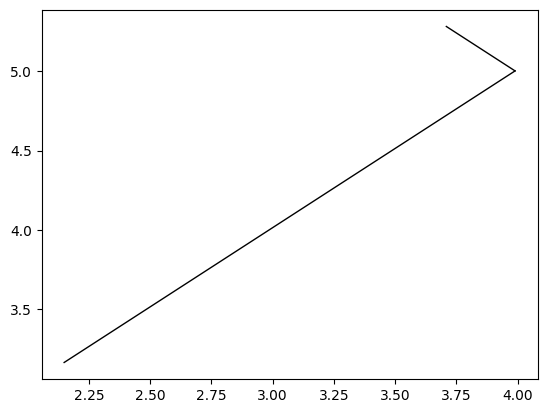

In [97]:
draw_line(mu, mu + 1.5 * S[0] * U[:, 0])
draw_line(mu, mu + 1.5 * S[1] * U[:, 1])

In [98]:
# ===================== Part 3: Dimension Reduction =====================

In [106]:
def project_data(X, U, K):
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))
    Z=np.dot(X,U[:,np.arange(K)])
    return Z

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


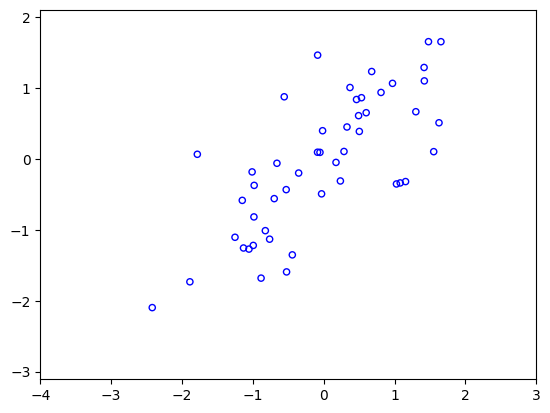

In [107]:
# Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b', s=20)
plt.axis('equal')
plt.axis([-4, 3, -4, 3])
plt.show()

In [108]:
# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)

In [111]:
def recover_data(Z, U, K):
    
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    
    X_rec=np.dot(Z,U[:,np.arange(K)].T)

    return X_rec

In [113]:
X_rec = recover_data(Z, U, K)

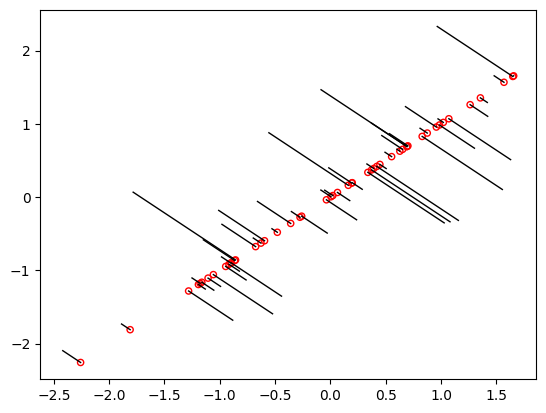

In [117]:
# Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r', s=20)
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i], X_rec[i])

In [118]:
# ===================== Part 4: Loading and Visualizing Face Data =====================

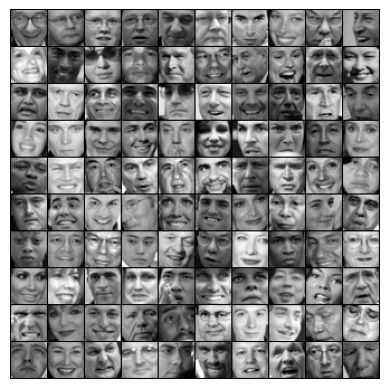

In [123]:
data = scio.loadmat('ex7faces.mat')
X = data['X']

disp.display_data(X[0:100])

In [126]:
# ===================== Part 5: PCA on Face Data: Eigenfaces =====================

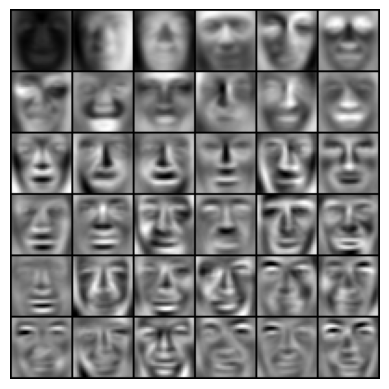

In [125]:
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S = pca(X_norm)

# Visualize the top 36 eigenvectors found
disp.display_data(U[:, 0:36].T)

In [129]:
# ===================== Part 6: Dimension Reduction for Faces =====================
K = 100
Z = project_data(X_norm, U, K)

In [130]:
# =========== Part 7: Visualization of Faces after PCA Dimension Reduction ===========

(np.float64(-1.0), np.float64(1.0), np.float64(-1.0), np.float64(1.0))

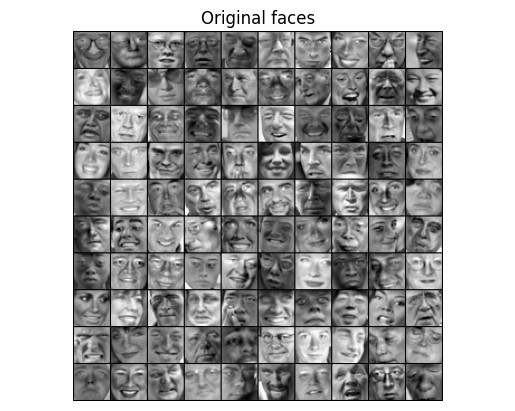

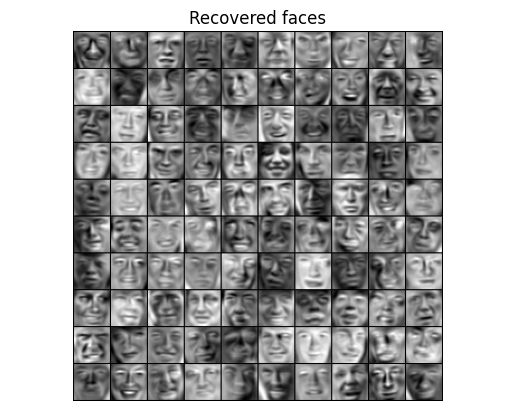

In [132]:
K = 100
X_rec = recover_data(Z, U, K)

# Display normalized data
disp.display_data(X_norm[0:100])
plt.title('Original faces')
plt.axis('equal')

# Display reconstructed data from only k eigenfaces
disp.display_data(X_rec[0:100])
plt.title('Recovered faces')
plt.axis('equal')

In [133]:
# ===================== Part 8(a): PCA for Visualization ====================

C:\Users\Elmostafa\AppData\Local\Temp\ipykernel_17908\3219654165.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


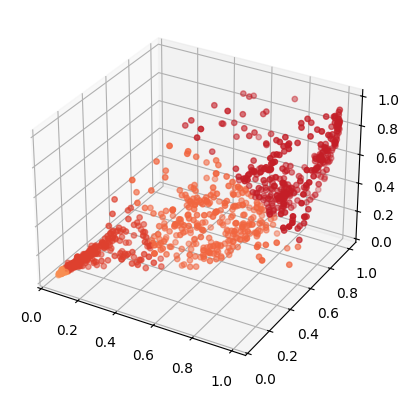

In [135]:
image = io.imread('bird_small.png')
image = img_as_float(image)

img_shape = image.shape

X = image.reshape((img_shape[0] * img_shape[1], 3))
K = 16
max_iters = 10
initial_centroids = kmeans_init_centroids(X, K)
centroids, idx = run_kmeans(X, initial_centroids, max_iters, False)

# Sample 1000 random indices (since working with all the data is
# too expensive. If you have a fast computer, you may increase this.
selected = np.random.randint(X.shape[0], size=1000)

# Visualize the data and centroid memberships in 3D
cm = plt.cm.get_cmap('RdYlBu')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[selected, 0], X[selected, 1], X[selected, 2], c=idx[selected].astype(np.float64), s=15, cmap=cm, vmin=0, vmax=K)

Text(0.5, 1.0, 'Pixel dataset plotted in 2D, using PCA for dimensionality reduction')

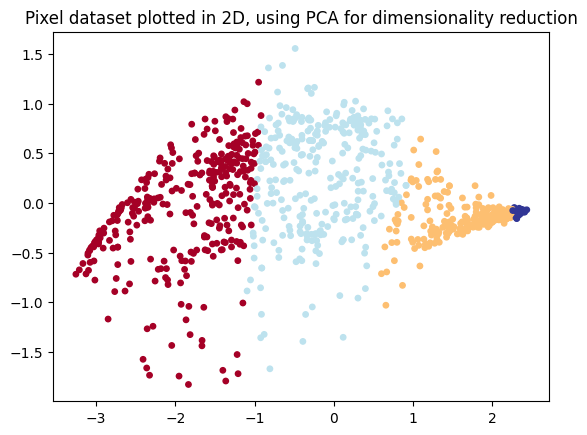

In [139]:
# ===================== Part 8(b): PCA for Visualization =====================
# Use PCA to project this cloud to 2D for visualization

X_norm, mu, sigma = feature_normalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = project_data(X_norm, U, 2)

# Plot in 2D
plt.figure()
plt.scatter(Z[selected, 0], Z[selected, 1], c=idx[selected].astype(np.float64), s=15, cmap=cm)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')